In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# So that plots appear inside jupyter notebook
%matplotlib inline 

# Models from scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Models to evaluate
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [3]:
df = pd.read_csv("data/heart-disease.csv")
df.shape

(303, 14)

In [4]:
x = df.drop("target", axis =1)

y = df["target"]

In [5]:
# Set random seed
np.random.seed(42)

# split into train and test sets

x_train, x_test, y_train, y_test = train_test_split(x,
                                                   y,
                                                   test_size = 0.2)

In [6]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [7]:
# now we have to choose a model
np.random.seed(42)
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Creat o function to fit and score the model

def fit_and_score(models, x_train,x_test, y_train, y_test):
    model_scores = {}
    for name, model in models.items():
        model.fit(x_train, y_train)
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [8]:
model_scores = fit_and_score(models = models,
                             x_train= x_train,
                             x_test = x_test,
                             y_train= y_train,
                             y_test = y_test)
model_scores

C:\Users\Siddharth\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Hyperparameter Tuning( by hand/ by using loop)

In [9]:
# Let's Tune KNN
train_score = []
test_score = []
# Creating different values of n_neighbor
neighbors = range(1,21)
# setup KNN instance

knn = KNeighborsClassifier()
# Loop for different values of n_neighbor
for i in neighbors:
    knn.set_params(n_neighbors = i)
    # fit the model/algorithm
    knn.fit(x_train, y_train)
    # Update the training score list
    train_score.append(knn.score(x_train, y_train))
    # Update the test score list
    test_score.append(knn.score(x_test, y_test))

In [10]:
train_score


[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

Maximum KNN score on test data:75.41%


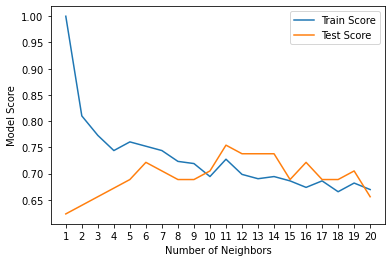

In [11]:
plt.plot(neighbors, train_score, label = "Train Score")
plt.plot(neighbors, test_score, label = "Test Score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of Neighbors")
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum KNN score on test data:{max(test_score)*100:.2f}%")

## Hyperparameter Tuning with RandomizedSearchCV

We're going to tune:

       * LogisticRegression()
       * RandomForestClassifier()
    ...Using RandomizedSearchCV   

In [12]:
# Creating a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4,4,20),
                "solver": ["liblinear"]}



# Creating a hyperparameter grid for RandomForestClassifier

rf_grid = {"n_estimators": np.arange(10,1000,50),
           "max_depth": [None, 3,5,10],
           "min_samples_split":np.arange(2,20,2),
           "min_samples_leaf":np.arange(1,20,2)}

In [13]:
 # After seting up hyperparameters grid, lets tune our models
    
# Lets tune LogisticRegression()
np.random.seed(42)

# setup random hyperparameter search for LogisticRegression()
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression

rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [14]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [15]:
rs_log_reg.score(x_test, y_test)

0.8852459016393442

In [16]:
# After trying to tune LogisticRegression() we will now try to tune RandomForestClassifer()
# Setting up random seed
np.random.seed(42)

# Setup hyperparameters

rs__rf = RandomizedSearchCV(RandomForestClassifier(),
                            param_distributions= rf_grid,
                            cv = 5,
                            n_iter=20,
                            verbose=True)

rs__rf.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [17]:
rs__rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [18]:
# Evaluate the best model

rs__rf.score(x_test, y_test)

0.8688524590163934

In [19]:
# after tuneing score of three models is observed and KNN model scores lowest therefore it is eliminated
# RandomForestClassifier() is also eliminated as it score lower that LogisticRegression() model
# Now we will firther tune  LogisticRegression() model to achive even better accuracy



## Hyperparameters by GridSearchCV


In [20]:
# Setting up grid

log_reg_grid = {"C": np.logspace(-4,4,30),
                "solver": ["liblinear"]}
    

gs_log_reg = GridSearchCV(LogisticRegression(),
                                param_grid=log_reg_grid,
                                cv=5,
                                verbose=True)
gs_log_reg.fit(x_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [21]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [22]:
gs_log_reg.score(x_test, y_test)

0.8852459016393442

In [24]:
y_preds = gs_log_reg.predict(x_test)

In [25]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [26]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

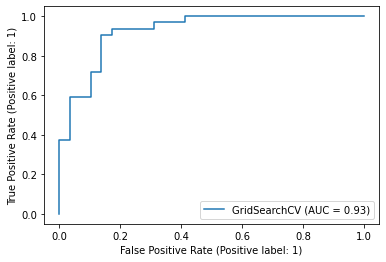

In [28]:
# Ploting a ROC Curve
plot_roc_curve(gs_log_reg, x_test, y_test)

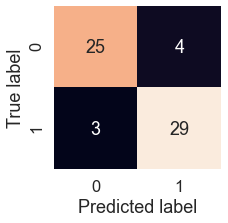

In [30]:
# Confusion Matrix

sns.set(font_scale = 1.5)
def plot_conf_mat(y_test, y_preds):
    
    
    fig, ax = plt.subplots(figsize = (3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot= True,
                     cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis 
    
#     top, bottom = ax.get_ylim()
#     ax.set_ylim(bottom + 0.5, top + 0.5)

# Above two lines are required when he numbers written in matric are not at proper place
# but in newer versions of sns it is fixed
    
plot_conf_mat(y_test, y_preds)

## Calculate Evaluation matrix with cross validation

In [31]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [34]:
# Creat a new classifier with best parameters
clf = LogisticRegression(C= 0.20433597178569418, 
                         solver = 'liblinear')

In [37]:
# Cross-validation accuracy
cv_acc = cross_val_score(clf,
                         x,
                         y,
                         cv = 5,
                         scoring= "accuracy")
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [41]:
# Cross-validation precision
cv_precision = cross_val_score(clf,
                         x,
                         y,
                         cv = 5,
                         scoring= "precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.8207936507936507

In [38]:
# Cross-validation recall
cv_recall = cross_val_score(clf,
                         x,
                         y,
                         cv = 5,
                         scoring= "recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [40]:
# Cross-validation f1-score
cv_f1 = cross_val_score(clf,
                         x,
                         y,
                         cv = 5,
                         scoring= "f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

<AxesSubplot:title={'center':'Cross-validated classification matrics'}>

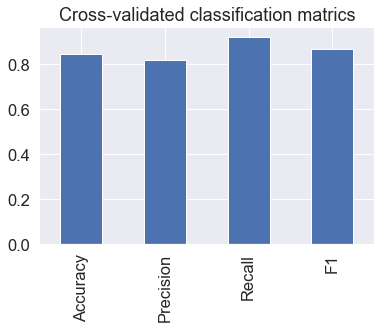

In [46]:
# Visualize cross validation matrics

cv_matrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                        index = [0])

cv_matrics.T.plot.bar(title = "Cross-validated classification matrics",
                      legend = False)